<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# checking to see what the data titles look like
df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**
choice: AVG_MATH_8_SCORE

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
# check how many variables dataframe has
len(df['YEAR'].unique())

33

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [5]:
df1=df[df['STATE'].isin(['MICHIGAN'])]
df1['AVG_MATH_8_SCORE'].mean()

276.1666666666667

In [6]:
df2=df[df['STATE'].isin(['OHIO'])]
df2['AVG_MATH_8_SCORE'].mean()

282.25

Find the average for your pedictor score across all states in 2019

In [7]:
df[df['YEAR'] == 2019].AVG_MATH_8_SCORE.mean()

281.2641509433962

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [8]:
df.groupby('STATE').max()

,PRIMARY_KEY,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2019_ALABAMA,2019,748889.0,7726213.0,1134111.0,4649053.0,2603240.0,7847387.0,3947003.0,2439634.0,...,60012.0,60004.0,52848.0,473954.0,222638.0,755552.0,233.0,269.0,220.0,259.0
ALASKA,2019_ALASKA,2019,133508.0,2920986.0,420152.0,2026555.0,573696.0,2968341.0,1484610.0,1068849.0,...,10926.0,11140.0,10092.0,85124.0,42441.0,135373.0,237.0,283.0,214.0,261.0
ARIZONA,2019_ARIZONA,2019,987332.0,9272152.0,1579806.0,4458836.0,4128871.0,9581201.0,4296503.0,2983729.0,...,89184.0,86312.0,86960.0,694046.0,354901.0,1123137.0,240.0,283.0,216.0,263.0
ARKANSAS,2019_ARKANSAS,2019,479881.0,5401016.0,827026.0,4122377.0,835486.0,5669431.0,2658253.0,1802769.0,...,38800.0,37369.0,33097.0,297045.0,143487.0,496085.0,240.0,279.0,219.0,262.0
CALIFORNIA,2019_CALIFORNIA,2019,6307022.0,89217262.0,9990221.0,50904567.0,30603616.0,85320133.0,42587272.0,26058021.0,...,493415.0,500143.0,498403.0,3929869.0,2013687.0,6441557.0,235.0,277.0,216.0,263.0
COLORADO,2019_COLORADO,2019,880678.0,10123271.0,969288.0,4365019.0,5044338.0,9878524.0,4786838.0,3333043.0,...,69784.0,67854.0,68112.0,543056.0,270405.0,910280.0,247.0,292.0,227.0,271.0
CONNECTICUT,2019_CONNECTICUT,2019,552512.0,11419673.0,818573.0,4411204.0,6539874.0,10826431.0,6110631.0,3307162.0,...,45307.0,45854.0,41381.0,357061.0,177037.0,577390.0,245.0,289.0,230.0,275.0
DELAWARE,2019_DELAWARE,2019,121845.0,2043577.0,192182.0,1172219.0,737198.0,2041952.0,1126775.0,588181.0,...,10838.0,10494.0,9100.0,84105.0,40903.0,136293.0,243.0,284.0,226.0,267.0
DISTRICT_OF_COLUMBIA,2019_DISTRICT_OF_COLUMBIA,2019,80937.0,1382282.0,184825.0,0.0,1235916.0,1360942.0,594396.0,450060.0,...,6339.0,6085.0,4806.0,46680.0,20242.0,87315.0,235.0,269.0,214.0,250.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [9]:
# check how many NaN value are in each varables
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [10]:
df.notna().sum()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL                          1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1542
GRADES_KG_G                     1632
GRADES_4_G                      1632
GRADES_8_G                      1632
GRADES_12_G                     1632
GRADES_1_8_G                    1020
GRADES_9_12_G                   1071
GRADES_ALL_G                    1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [11]:
# drop empty values in variables that don't have a lot of NaN
df.dropna(subset=['GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_PK_G', 
                  'GRADES_KG_G','GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
                  'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 
                  'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 
                  'CAPITAL_OUTLAY_EXPENDITURE'], inplace=True)

In [12]:
# fill empty value with mode or mean for values that have a lot of NaN
df['ENROLL'] = df['ENROLL'].fillna(df['ENROLL'].mode())
df['TOTAL_REVENUE'] = df['TOTAL_REVENUE'].fillna(df['TOTAL_REVENUE'].mean())
df['FEDERAL_REVENUE'] = df['FEDERAL_REVENUE'].fillna(df['FEDERAL_REVENUE'].mean())
df['STATE_REVENUE'] = df['STATE_REVENUE'].fillna(df['STATE_REVENUE'].mean())
df['LOCAL_REVENUE'] = df['LOCAL_REVENUE'].fillna(df['LOCAL_REVENUE'].mean())
df['AVG_MATH_8_SCORE'] = df['AVG_MATH_8_SCORE'].fillna(df['AVG_MATH_8_SCORE'].mean())
df['AVG_MATH_4_SCORE'] = df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].mean())
df['AVG_READING_8_SCORE'] = df['AVG_READING_8_SCORE'].fillna(df['AVG_READING_8_SCORE'].mean())
df['AVG_READING_4_SCORE'] = df['AVG_READING_4_SCORE'].fillna(df['AVG_READING_4_SCORE'].mean())

In [13]:
# check for NaN after drop and filling
df.isna().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

Final feature list: ENROLL, TOTAL_REVENUE, FEDERAL_REVENUE, STATE_REVENUE, 
                    LOCAL_REVENUE, STATE, YEAR, AVG_MATH_8_SCORE, AVG_READING_8_SCORE

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th grade reading scores')

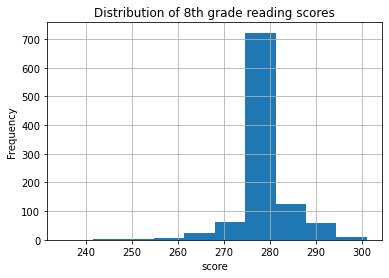

In [14]:
# use histogram to visualize how the data distribute
plt.hist(df['AVG_MATH_8_SCORE'])
plt.xlabel('score')
plt.ylabel('Frequency')
plt.grid()
plt.title('Distribution of 8th grade reading scores')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='ENROLL'>

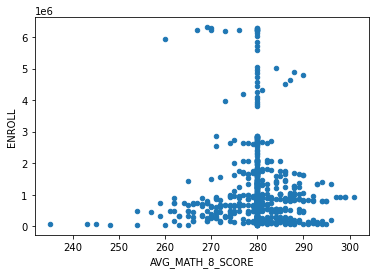

In [15]:
# use scatter plot to see score relationship with Enroll
df.plot.scatter(x='AVG_MATH_8_SCORE',y='ENROLL')

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='SUPPORT_SERVICES_EXPENDITURE'>

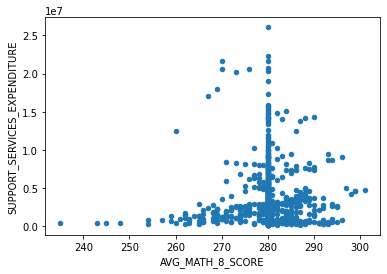

In [16]:
# use scatter plot to see score relationship with support services expenditure
df.plot.scatter(x='AVG_MATH_8_SCORE',y='SUPPORT_SERVICES_EXPENDITURE')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# define values that will be use as X to predict y
X = df[['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
        'YEAR', 'AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [20]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [21]:
# create your model here
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
model.score(X_test, y_test)

0.43362664040143495

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'score')

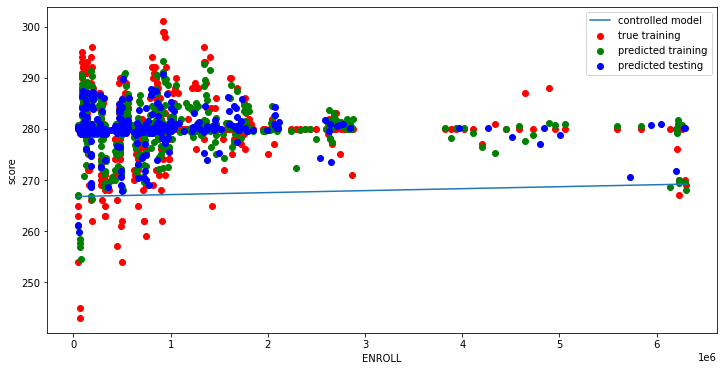

In [26]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ENROLL'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('score')

<h2> Summary </h2>

My work had erase all theempty value i the orignal data set. I had test for few variables in the dataset and it's relation to AVG_MATH_8_SCORE, the score I'm interested in through visualization. I had than use variables that I think have relation with AVG_MATH_8_SCORE in machine learning to predict score results. Overall the predict training and predict testing are similarly distributed, but the model score is only 0.43. This means the model accuracy can still be improved, but it can be a tool to predict trend for the score.